# Model Training
The following notebook trains two deep learning models:
1. **SheetClassifier**: A model for identifying images of metal sheets with defects, classifying them by their defect.
2. **SheetHighlighter**: A model which takes images of metal sheets with defects and highlights the defects in the image.

In [3]:
# Imports
%load_ext autoreload
%autoreload 2

import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset, random_split
from trainer import Trainer
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'
trainer = Trainer()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Classifier with Resnet
Quick demonstration of transfer learning.

In [ ]:
from models.ResnetClassifier import ResnetClassifier
from datasets.ResnetSet import ResnetSet

resnet_model = ResnetClassifier()

class_set = ResnetSet('./sheet_data/training_set')
trainer.run_experiment(resnet_model, class_set, epochs=20, learning_rate= 0.001, criterion=nn.CrossEntropyLoss, show=True)
trainer.evaluate_model(resnet_model, show=True)
''

C:\Users\slayt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\slayt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/20], Train Loss: 1.08, Accuracy: 0.49
Epoch [6/20], Train Loss: 0.51, Accuracy: 0.81
Epoch [11/20], Train Loss: 0.42, Accuracy: 0.85
Epoch [16/20], Train Loss: 0.40, Accuracy: 0.84
Experiment Complete
[Evaluation over 4 Batches], Test Loss: 0.37, Accuracy: 0.86


''

# Training the Classifier

In [ ]:
from models.SheetClassifier import SheetClassifier
from datasets.ClassificationSet import ClassificationSet

model = SheetClassifier()
class_set = ClassificationSet('./sheet_data/training_set')
trainer.run_experiment(model, class_set, epochs=20, learning_rate= 0.001, criterion=nn.CrossEntropyLoss, show=True)
trainer.evaluate_model(model, show=True)

Epoch [1/20], Train Loss: 0.61, Accuracy: 0.76
Epoch [6/20], Train Loss: 0.02, Accuracy: 1.00
Epoch [11/20], Train Loss: 0.00, Accuracy: 1.00
Epoch [16/20], Train Loss: 0.00, Accuracy: 1.00
Experiment Complete
[Evaluation over 4 Batches], Test Loss: 0.53, Accuracy: 0.80


SheetClassifier(
  (model): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (lin1): Linear(in_features=16384, out_features=3, bias=True)
)

## Overfitting Detected
Training accuracies **that** high **that** fast are invariably an example of overfitting (which we confirm by the comparatively low testing accuracy). To remedy this I'll reduce the node count and learning rate, though there are many different approaches.

In [ ]:
sc_model = SheetClassifier(4)
class_set = ClassificationSet('./sheet_data/training_set')
trainer.run_experiment(sc_model, class_set, epochs=20, learning_rate= 0.0001, criterion=nn.CrossEntropyLoss, show=True)
trainer.evaluate_model(sc_model, show=True)

Epoch [1/20], Train Loss: 0.85, Accuracy: 0.58
Epoch [6/20], Train Loss: 0.34, Accuracy: 0.91
Epoch [11/20], Train Loss: 0.22, Accuracy: 0.97
Epoch [16/20], Train Loss: 0.15, Accuracy: 0.99
Experiment Complete
[Evaluation over 4 Batches], Test Loss: 0.39, Accuracy: 0.85


SheetClassifier(
  (model): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (lin1): Linear(in_features=8192, out_features=3, bias=True)
)

In [ ]:
torch.save(model.state_dict(),'./classifier_model.pkl')

# Training the Highlighter

In [10]:
from models.SheetHighlighter import SheetHighlighter
from datasets.HighlighterSet import HighlighterSet

sh_model = SheetHighlighter()

highlight_set = HighlighterSet('./sheet_data/training_set')
trainer.run_experiment(sh_model, highlight_set, epochs=30, learning_rate= 0.0001, criterion=nn.BCELoss, show=True)
trainer.evaluate_model(sh_model, show=True)

Epoch [1/30], Train Loss: 0.75, Accuracy: 0.57
Epoch [6/30], Train Loss: 0.52, Accuracy: 0.67
Epoch [11/30], Train Loss: 0.29, Accuracy: 0.81
Epoch [16/30], Train Loss: 0.17, Accuracy: 0.90
Epoch [21/30], Train Loss: 0.13, Accuracy: 0.93
Epoch [26/30], Train Loss: 0.11, Accuracy: 0.95
Experiment Complete
[Evaluation over 4 Batches], Test Loss: 0.11, Accuracy: 0.95


SheetHighlighter(
  (model): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ConvTranspose2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(8, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): Sigmoid()
  )
)

In [11]:
torch.save(sh_model.state_dict(),'./highlighter_model.pkl')

### Highlighter Demonstration

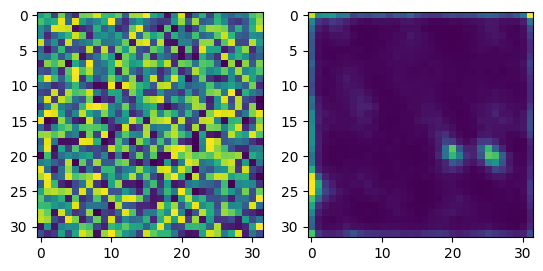

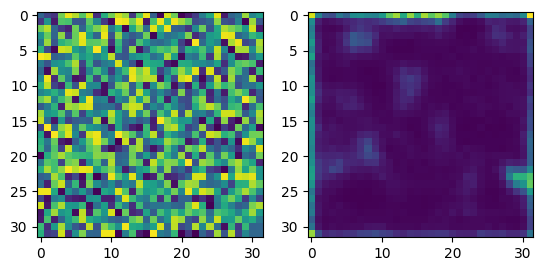

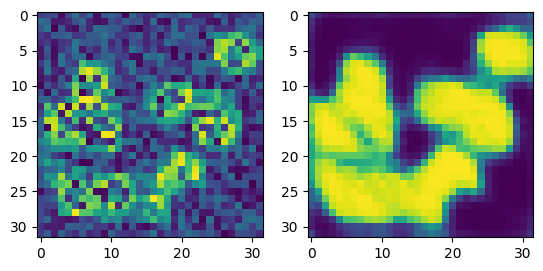

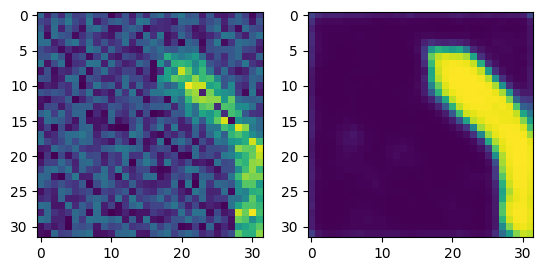

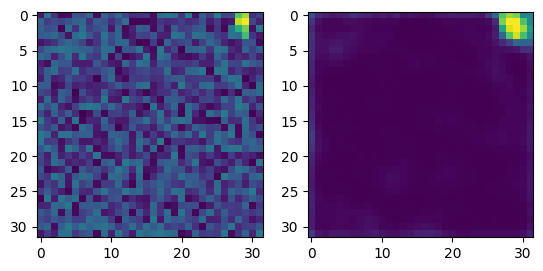

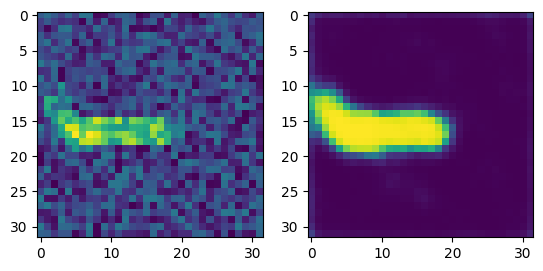

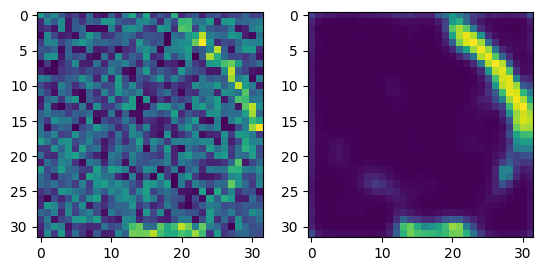

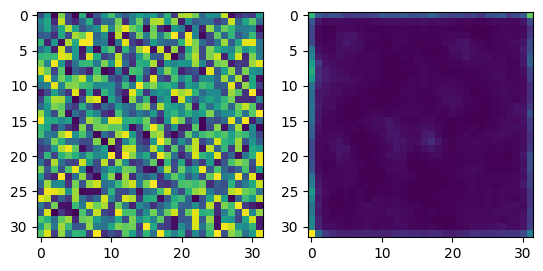

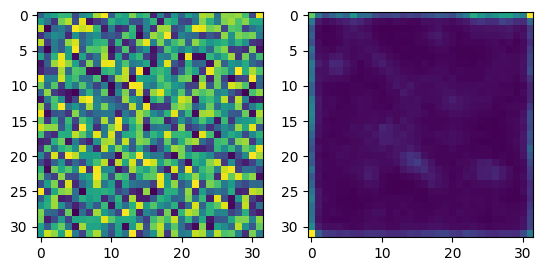

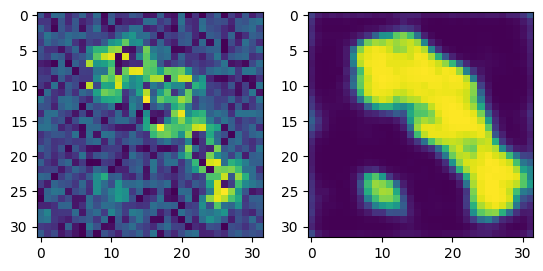

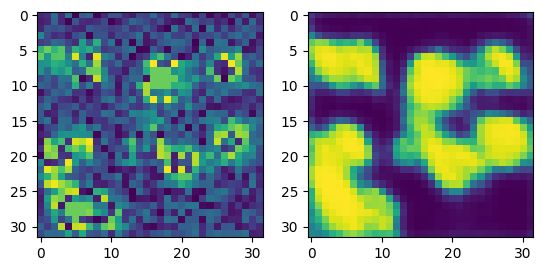

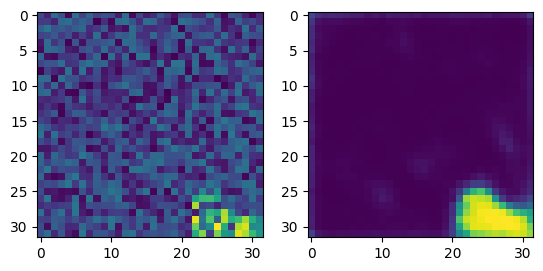

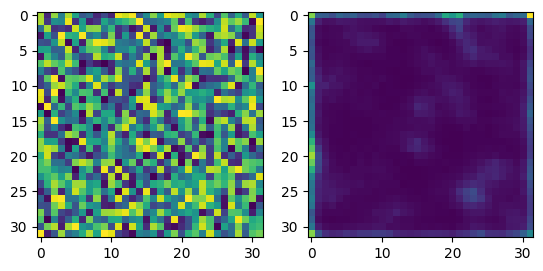

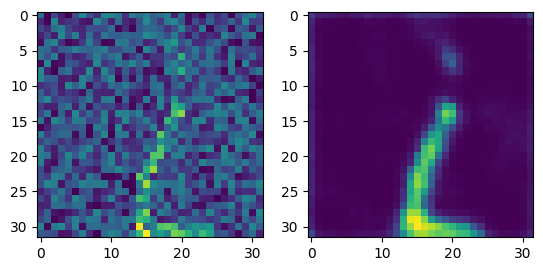

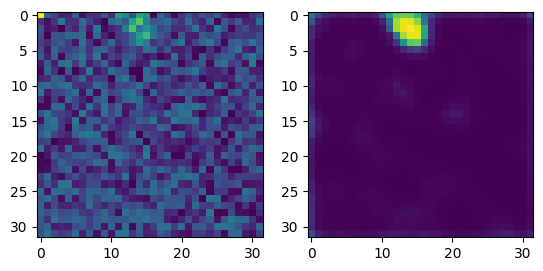

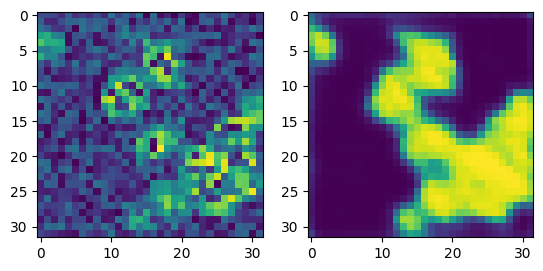

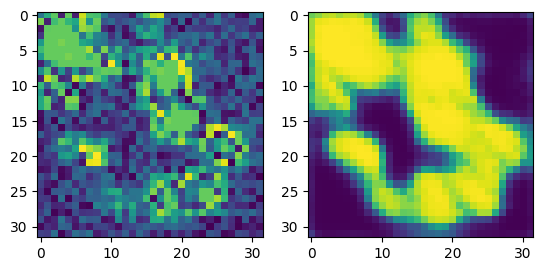

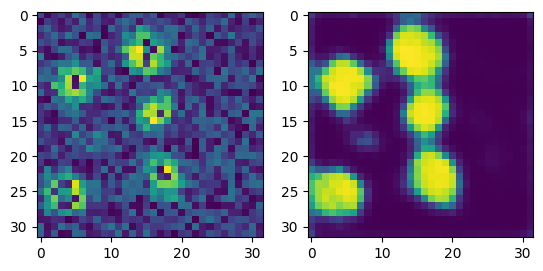

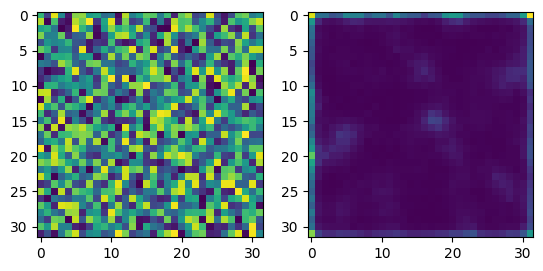

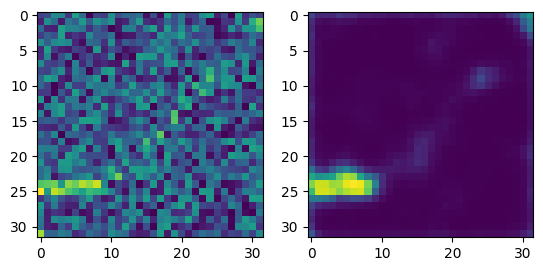

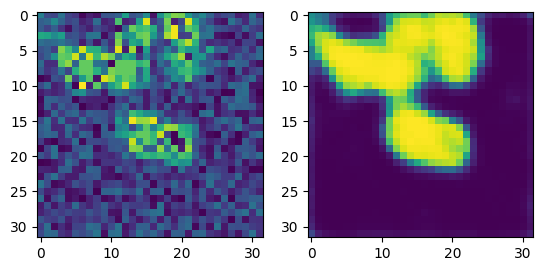

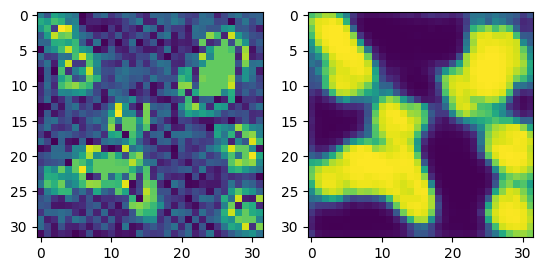

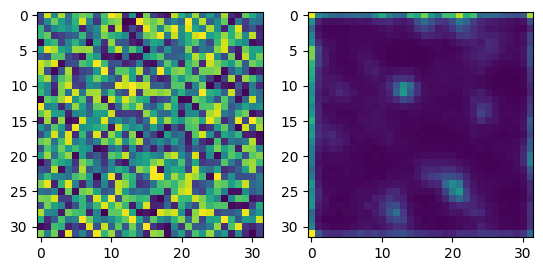

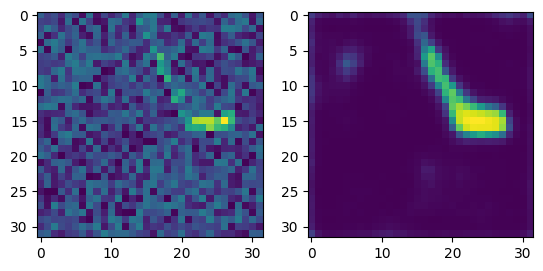

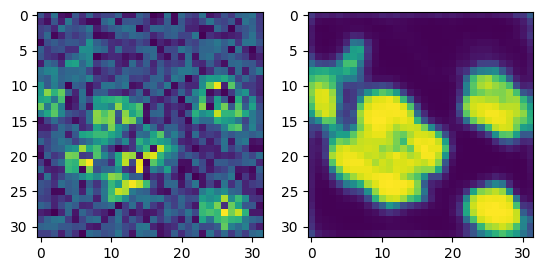

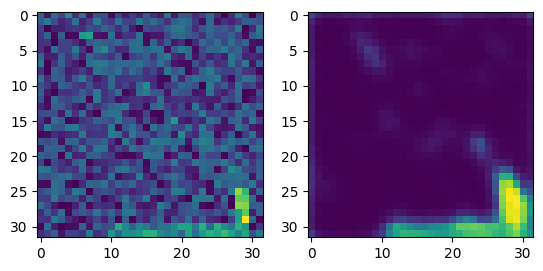

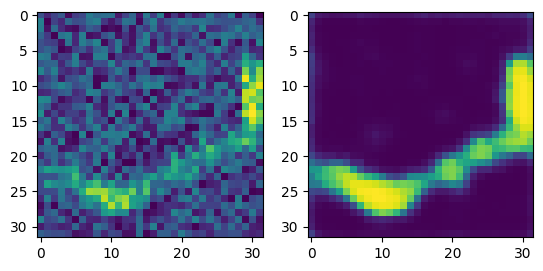

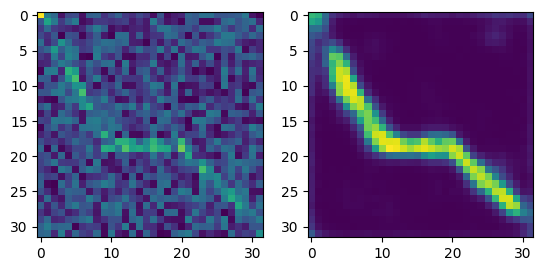

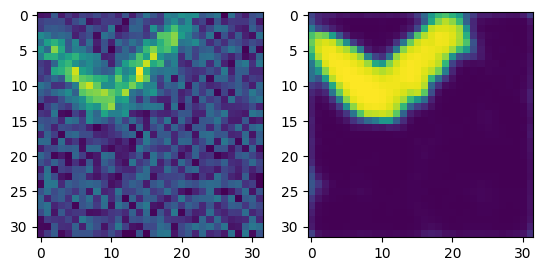

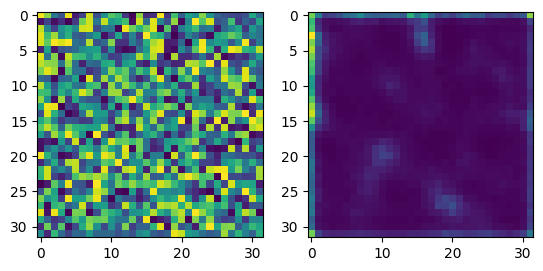

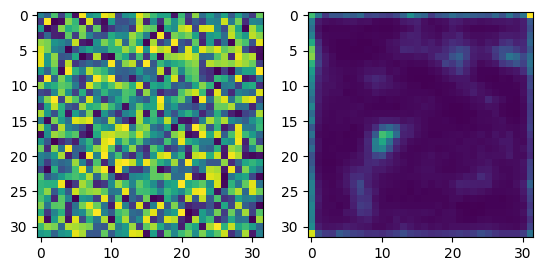

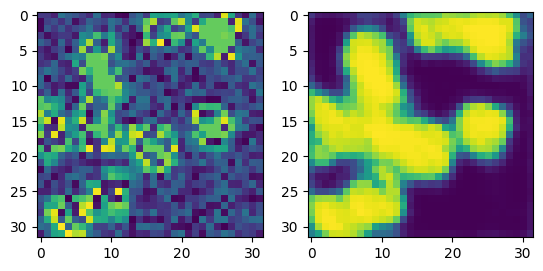

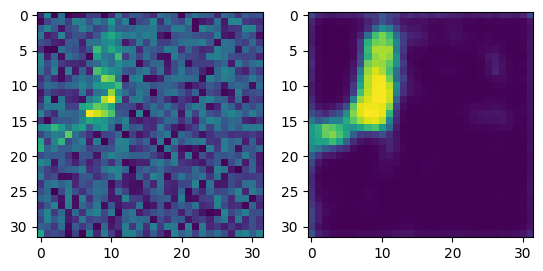

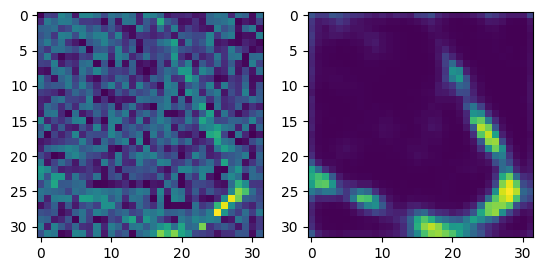

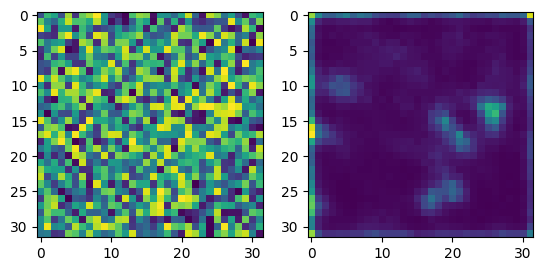

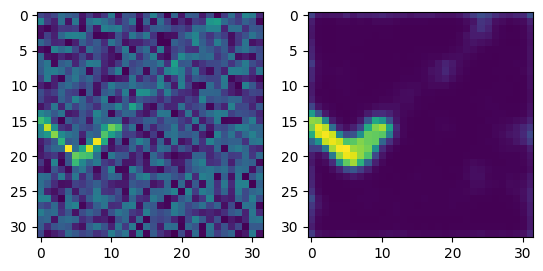

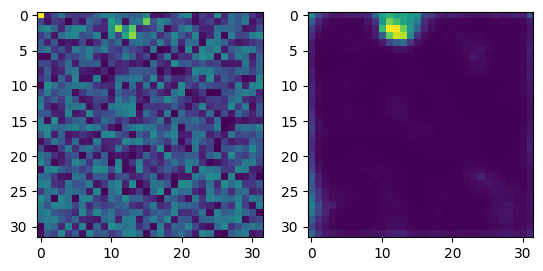

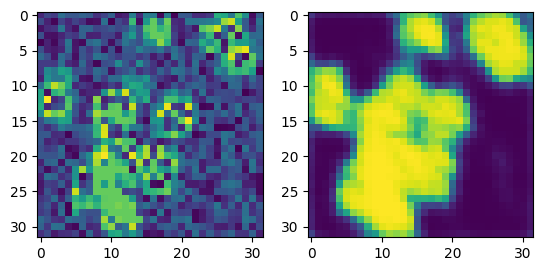

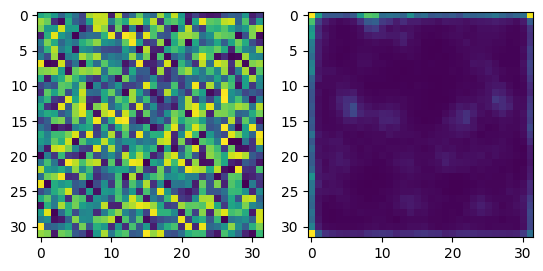

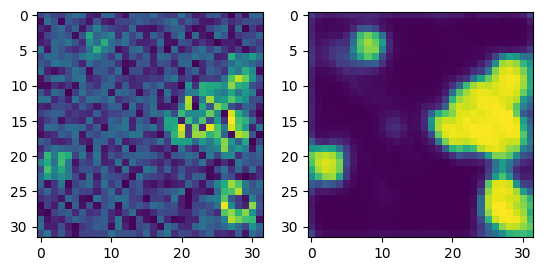

In [14]:
for i, (x,y) in enumerate(trainer.testing_loader):
    if i > 1: break
    yhat = sh_model(x)
    for j in range(len(x))[:20]:
        sample, prediction = x[j], yhat[j].detach().numpy()[0]
        plt.subplot(1,2,1)
        plt.imshow(sample[0])
        plt.subplot(1,2,2)
        plt.imshow(prediction)
        plt.show()